<a href="https://colab.research.google.com/github/alagarde-bit/Computer-Vision/blob/main/hw04_Lagarde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Homework 4 - Puzzles
### 4/4/2022
### *** Alex Lagarde ***

I was able to successfully create and display the stones and bread puzzles using the smaller pictures as the guided image and the rotated pieces. I think those worked exactly as desired. As for the window puzzle, I have a couple misplaced pieces, but I have it almost perfectly created and displayed. The problem with the window puzzle was certain pieces would get stacked on top of each other because multiple pieces matched with the same 50x50 location in the guided image. I am not sure why the window image was particularly more difficult. I assume this has to do with the fact there are a lot more similar pixels with the gray areas and the thin window frames which makes it harder to detect differences. Also since we use just the single best match maybe if we used more cummulatively it would solve the issue where certain pieces were incorrectly placed and then the correct piece would be placed above it.  My strength was correctly placing the puzzle pieces for the stones and bread images. My weakness was not completely placing all the puzzle pieces for the window image and the fact that my runtime was not optimal. I could have done more guessing and checking to find parameters that yielded the same results but had a shorter run time. I kept the same parameters for both stones and bread puzzles. I used 20000 features arbitrarly because it worked for both cases. I used 1.1 as a scale factor because it makes the algorithm more robust to changes in scale. I used 10 levels because from the orb detection graph it looked like it made things worse when I changed it. I used fast threshold of 1 to find more features because there would be less of a difference requirement for detection, and I used an edge threshold of 1 to make sure the orb detector can detect as close to the edge of the image or piece as possible. For the window image, I used 200000 for the maximum features to make sure I detect as many features as possible. I used a scale factor of 1.3 arbitrarly because I noticed when I used it, I saw a reduction of misplaced images, from 5 to 3. I used 10 levels again because it did not seem to improve anything when I changed the values. I used the same fast threshold and edge threshold parameters because I was trying to find as many features as possible that would help complete this puzzle. 


In this assignment, I was limited to orb detection and the best match. Maybe if I used SIFT or incorporated more best matches, I could have got to 100% for the window image. With more time, I would have figured out how to use logic to get the results. Maybe I could have used logic to brute force it a little. I would have also tried to make my algorithms more efficient. I attempted version 2 of the problem, where I used the smaller guide image with rotated pieces. I believe I completely met all requirements of this homework assignment. My code solves the version 2 by correctly calculating the output image size and rotating the pieces correctly. I think the puzzle images are succesfully created and displayed with a couple pieces misplaced as discussed earlier. I also believe my discussion all points for the write up. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1URgnWhxCkCAy24oSPBsqHlv5h29z4guP', dest_path='/content/hw04_puzzle_pieces.zip', unzip=True)


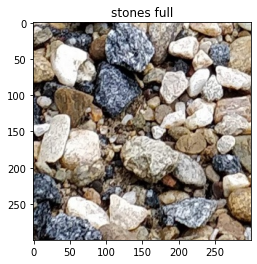

In [ ]:
# stones version 0
def read_in_pieces(folder):
  pieces = []
  path = os.path.join('/content/', folder, '')
  for image in os.listdir(path):
    img = cv2.imread(os.path.join(path, image))
    pieces.append(img)
  return pieces
stones_full_img = cv2.imread('stones/stones_full.jpg')
disp_stones_full = cv2.cvtColor(stones_full_img, cv2.COLOR_BGR2RGB)
plt.imshow(disp_stones_full)
plt.title('stones full')
plt.show()

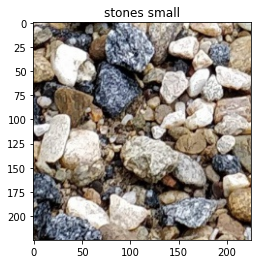

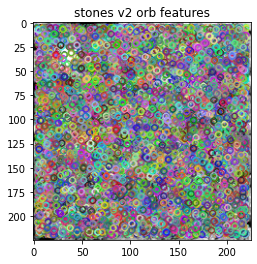

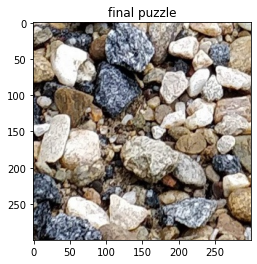

In [ ]:
# stones version 2
stones_small_img = cv2.imread('stones/stones_small.jpg')
disp_stones_small = cv2.cvtColor(stones_small_img, cv2.COLOR_BGR2RGB)
plt.imshow(disp_stones_small)
plt.title('stones small')
plt.show()
MAX_FEATURES = 20000
SCALE_FACTOR = 1.1
SCORE_TYPE = cv2.ORB_HARRIS_SCORE
LEVELS = 10
FAST_THRESH = 1
EDGE_THRESH = 1
stone_pieces_v2 = read_in_pieces('stones/pieces_random')
gray_stones_v2 = cv2.cvtColor(stones_small_img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(nfeatures = MAX_FEATURES, 
                     scaleFactor = SCALE_FACTOR,
                     nlevels = LEVELS,
                     scoreType = SCORE_TYPE,
                     fastThreshold = FAST_THRESH,
                     edgeThreshold = EDGE_THRESH)
kp1,des1 = orb.detectAndCompute(gray_stones_v2, None)
keypoints = orb.detect(gray_stones_v2)
img_display = gray_stones_v2.copy()
img_display = cv2.drawKeypoints(img_display, keypoints, None, None)
plt.imshow(img_display)
plt.title('stones v2 orb features')
plt.show()
length = len(stone_pieces_v2)
output_height = int(round(np.sqrt(2500 * length * 225/225)))
output_width = int(round((2500 * length) / np.sqrt(2500 * length* 225/225)))
hold_pieces = np.zeros((output_height, output_width, 3), 'uint8')
for img in stone_pieces_v2:
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  keypoints2 = orb.detect(gray_img)
  img_display2 = gray_img.copy()
  img_display2 = cv2.drawKeypoints(img_display2, keypoints2, None, None)
  kp2, des2 = orb.detectAndCompute(gray_img, None)
  bf3 = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = bf3.match(des2, des1)
  matches = sorted(matches, key = lambda x: x.distance)
  match = matches[0]
  curr_kp = kp2[match.queryIdx]
  orig_angle = curr_kp.angle
  curr_kp2 = kp1[match.trainIdx]
  loc = curr_kp2.pt
  new_angle = curr_kp2.angle
  orientation = orig_angle - new_angle
  orientation = round(orientation/90) * 90 
  scale_size = hold_pieces.shape[0] / stones_small_img.shape[0]
  top_left_corner_y= int(round(loc[1]*scale_size)) - int(round(loc[1]*scale_size) % 50)
  top_left_corner_x = int(round(loc[0]*scale_size)) - int(round(loc[0]*scale_size) % 50)
  bottom_left_corner_y =  top_left_corner_y + 50
  bottom_right_corner_x = top_left_corner_x + 50
  img_center = ((img.shape[1] - 1)/2,  (img.shape[0] - 1)/2)
  M = cv2.getRotationMatrix2D(img_center, orientation, 1.0)
  img_rot = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
  hold_pieces[top_left_corner_y:bottom_left_corner_y, top_left_corner_x:bottom_right_corner_x] = img_rot

disp_hold_pieces = cv2.cvtColor(hold_pieces, cv2.COLOR_BGR2RGB)
plt.imshow(disp_hold_pieces)
plt.title('final puzzle')
plt.show()


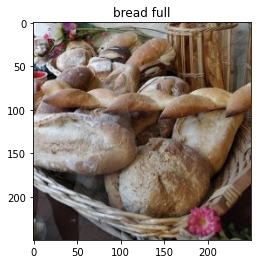

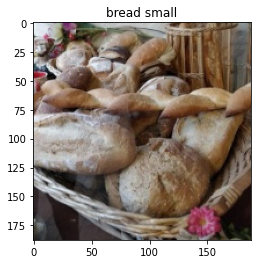

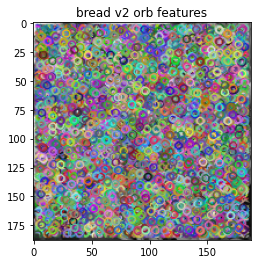

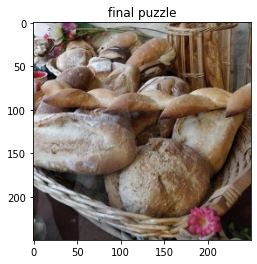

In [ ]:
bread_fullimg = cv2.imread('bread/bread_full.jpg')
disp_bread_full = cv2.cvtColor(bread_fullimg, cv2.COLOR_BGR2RGB)
plt.imshow(disp_bread_full)
plt.title('bread full')
plt.show()
# bread version 2
bread_small_img = cv2.imread('bread/bread_small.jpg')
disp_bread_small = cv2.cvtColor(bread_small_img, cv2.COLOR_BGR2RGB)
plt.imshow(disp_bread_small)
plt.title('bread small')
plt.show()
MAX_FEATURES2 = 20000
SCALE_FACTOR2 = 1.1
SCORE_TYPE2 = cv2.ORB_HARRIS_SCORE
LEVELS2 = 10
FAST_THRESH2 = 1
EDGE_THRESH2 = 1
bread_pieces_v2 = read_in_pieces('bread/pieces_random')
gray_bread_v2 = cv2.cvtColor(bread_small_img, cv2.COLOR_BGR2GRAY)
orb2 = cv2.ORB_create(nfeatures = MAX_FEATURES2, 
                     scaleFactor = SCALE_FACTOR2,
                     nlevels = LEVELS2,
                     scoreType = SCORE_TYPE2,
                     fastThreshold = FAST_THRESH2,
                     edgeThreshold = EDGE_THRESH2)
kp3,des3 = orb2.detectAndCompute(gray_bread_v2, None)
keypoints3 = orb2.detect(gray_bread_v2)
img_display3 = gray_bread_v2.copy()
img_display3 = cv2.drawKeypoints(img_display3, keypoints3, None, None)
plt.imshow(img_display3)
plt.title('bread v2 orb features')
plt.show()
length2 = len(bread_pieces_v2)
area2 = bread_pieces_v2[0].shape[0] * bread_pieces_v2[0].shape[1]
output_height2 = int(round(np.sqrt(area2 * length2 * bread_small_img.shape[0]/bread_small_img.shape[1])))
output_width2 = int(round((area2 * length2) / np.sqrt(area2 * length2 * bread_small_img.shape[0]/bread_small_img.shape[1])))
hold_pieces2 = np.zeros((output_height2, output_width2, 3), 'uint8')
for img2 in bread_pieces_v2:
  gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  keypoints4 = orb2.detect(gray_img2)
  img_display4 = gray_img2.copy()
  img_display4 = cv2.drawKeypoints(img_display4, keypoints4, None, None)
  # plt.imshow(part)
  # plt.show()
  kp4, des4 = orb2.detectAndCompute(gray_img2, None)
  bf2 = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches2 = bf2.match(des4, des3)
  matches2 = sorted(matches2, key = lambda x: x.distance)
  match2 = matches2[0]
  curr_kp3 = kp4[match2.queryIdx]
  orig_angle2 = curr_kp3.angle
  curr_kp4 = kp3[match2.trainIdx]
  loc2 = curr_kp4.pt
  new_angle2 = curr_kp4.angle
  orientation2 = orig_angle2 - new_angle2
  orientation2 = round(orientation2/90) * 90 
  scale_size2 = hold_pieces2.shape[0] / bread_small_img.shape[0]
  top_left_corner_y2= int(round(loc2[1]*scale_size2)) - int(round(loc2[1]*scale_size2) % 50)
  top_left_corner_x2 = int(round(loc2[0]*scale_size2)) - int(round(loc2[0]*scale_size2) % 50)
  bottom_left_corner_y2 =  top_left_corner_y2 + 50
  bottom_right_corner_x2 = top_left_corner_x2 + 50
  img_center2 = ((img2.shape[1] - 1)/2,  (img2.shape[0] - 1)/2)
  M2 = cv2.getRotationMatrix2D(img_center2, orientation2, 1.0)
  img_rot2 = cv2.warpAffine(img2, M2, (img2.shape[1], img2.shape[0]))
  hold_pieces2[top_left_corner_y2:bottom_left_corner_y2, top_left_corner_x2:bottom_right_corner_x2] = img_rot2

disp_hold_pieces2 = cv2.cvtColor(hold_pieces2, cv2.COLOR_BGR2RGB)
plt.imshow(disp_hold_pieces2)
plt.title('final puzzle')
plt.show()


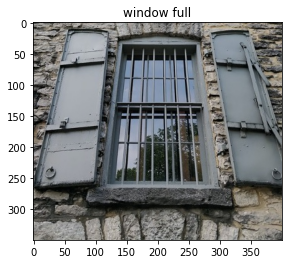

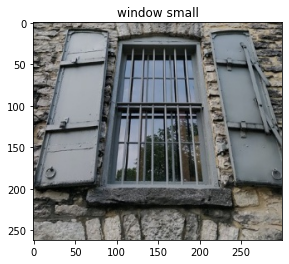

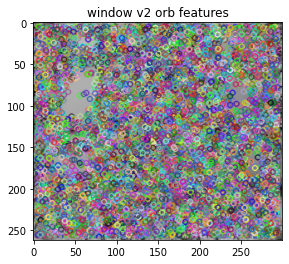

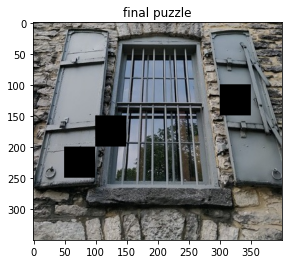

In [ ]:
window_fullimg = cv2.imread('window/window_full.jpg')
disp_window_full = cv2.cvtColor(window_fullimg, cv2.COLOR_BGR2RGB)
plt.imshow(disp_window_full)
plt.title('window full')
plt.show()
# window version 2
window_small_img = cv2.imread('window/window_small.jpg')
disp_window_small = cv2.cvtColor(window_small_img, cv2.COLOR_BGR2RGB)
plt.imshow(disp_window_small)
plt.title('window small')
plt.show()
MAX_FEATURES3 = 200000
SCALE_FACTOR3 = 1.3
SCORE_TYPE3 = cv2.ORB_HARRIS_SCORE
LEVELS3 = 10
FAST_THRESH3 = 1
EDGE_THRESH3 = 1
window_pieces_v2 = read_in_pieces('window/pieces_random')
gray_window_v2 = cv2.cvtColor(window_small_img, cv2.COLOR_BGR2GRAY)
orb3 = cv2.ORB_create(nfeatures = MAX_FEATURES3, 
                     scaleFactor = SCALE_FACTOR3,
                     nlevels = LEVELS3,
                     scoreType = SCORE_TYPE3,
                     fastThreshold = FAST_THRESH3,
                     edgeThreshold = EDGE_THRESH3)
kp5,des5 = orb3.detectAndCompute(gray_window_v2, None)
keypoints5 = orb3.detect(gray_window_v2)
img_display5 = gray_window_v2.copy()
img_display5 = cv2.drawKeypoints(img_display5, keypoints5, None, None)
plt.imshow(img_display5)
plt.title('window v2 orb features')
plt.show()
length3 = len(window_pieces_v2)
area3 = window_pieces_v2[0].shape[0] * window_pieces_v2[0].shape[1]
output_height3 = int(round(np.sqrt(area3 * length3 * window_small_img.shape[0]/window_small_img.shape[1])))
output_width3 = int(round((area3 * length3) / np.sqrt(area3 * length3 * window_small_img.shape[0]/window_small_img.shape[1])))
hold_pieces3 = np.zeros((output_height3, output_width3, 3), 'uint8')
for img3 in window_pieces_v2:
  gray_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
  keypoints6 = orb3.detect(gray_img3)
  img_display6 = gray_img3.copy()
  img_display6 = cv2.drawKeypoints(img_display6, keypoints6, None, None)
  kp6, des6 = orb3.detectAndCompute(gray_img3, None)
  bf3 = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches3 = bf3.match(des6, des5)
  matches3 = sorted(matches3, key = lambda x: x.distance)
  match3 = matches3[0]
  curr_kp5 = kp6[match3.queryIdx]
  orig_angle3 = curr_kp5.angle
  curr_kp6 = kp5[match3.trainIdx]
  loc3 = curr_kp6.pt
  new_angle3 = curr_kp6.angle
  orientation3 = orig_angle3 - new_angle3
  orientation3 = round(orientation3/90) * 90 
  scale_size3 = hold_pieces3.shape[0] / window_small_img.shape[0]
  top_left_corner_y3 = int(round(loc3[1]*scale_size3)) - int(round(loc3[1]*scale_size3) % 50)
  top_left_corner_x3 = int(round(loc3[0]*scale_size3)) - int(round(loc3[0]*scale_size3) % 50)
  bottom_left_corner_y3 =  top_left_corner_y3 + 50
  bottom_right_corner_x3 = top_left_corner_x3 + 50
  img_center3 = ((img3.shape[1] - 1)/2,  (img3.shape[0] - 1)/2)
  M3 = cv2.getRotationMatrix2D(img_center3, orientation3, 1.0)
  img_rot3 = cv2.warpAffine(img3, M3, (img3.shape[1], img3.shape[0]))
  hold_pieces3[top_left_corner_y3:bottom_left_corner_y3, top_left_corner_x3:bottom_right_corner_x3] = img_rot3
  disp_hold_pieces3 = cv2.cvtColor(hold_pieces3, cv2.COLOR_BGR2RGB)
plt.imshow(disp_hold_pieces3)
plt.title('final puzzle')
plt.show()